# Proyecto Redes Neuronales

Integrantes:
* Carlos Daniel Corrales (2122878)
* Jose Manuel Palma (2125182)

En esta segunda entrega del proyecto, se continua explorando el uso de redes neuronales para un problema de clasificación de texto con múltiples etiquetas, en este caso tratandose de la primera opción ofrecida en el curso que se trata sobre 'Reseñas reales de negocios calificadas desde 1 a 5 estrellas'. En esta segunda entrega la arquitectura empleada se hace uso de modelos de redes neuronales más avanzados, mas exactamente redes neuronales recurrentes y variaciones que nacieron a partir de esta que son las redes LSTM (Long Short Term Memory o en español Memoria a largo plazo) y las GRU (Gated Recurrent Units o Unidades Recurrentes Bloqueadas). Estas arquitecturas están diseñadas específicamente para procesar datos secuenciales como el lenguaje natural, permitiendo una mejor captura del contexto en las reseñas, esto en comparación con las MLP que se emplearon en la pirmera entrega.

Se mantuvo las tecnologias usadas en la pirmera entrega, específicamente Keras, la API de alto nivel de TensorFlow, como herramienta principal para el desarrollo del modelo.

---

El objetivo principal es entrenar un modelo que pueda identificar patrones en las reviews y asociarlos con una calificación en estrellas (1-5). Para eso, seguimos los siguientes pasos:

1. Descarga y preprocesamiento del dataset:
- Se obtienen los datos desde Kaggle, se exploran y se limpian.
- Se aplican tecnicas de procesamiento de texto como tokenizacion y vectorización.
- Se utilizó un vocabulario limitado a las 10,000 palabras más frecuentes y se emplearon embeddings GloVe de 100 dimensiones para representar las palabras.

2. Construcción y entrenamiento de las redes neuronales:
- Se entrenaron tres modelos por separado: una RNN simple, una LSTM y una GRU, todas en configuración bidireccional para una mejor captación del contexto.
- Se utilizó regularización, normalización, y early stopping para evitar el sobreajuste y mejorar la estabilidad del entrenamiento.

3. Evaluacion del desempeño:
- Se entrena el modelo con un conjunto de datos de entrenamiento y de testeo.
- Cada modelo fue evaluado con métricas como precisión, matriz de confusión y curvas de entrenamiento/validación.

---

En conjunto, esta entrega representa un avance significativo en el tratamiento del lenguaje natural con redes neuronales, incorporando elementos esenciales del aprendizaje profundo moderno como embeddings preentrenados y arquitecturas especializadas en secuencias.


# 1. Descargar dataset

In [ ]:
# Instalar la API de Kaggle
!pip install -q kaggle

Se usa files.upload() para subir el archivo kaggle.json, que contiene el personal token necesario para autenticarse en Kaggle. Este archivo debe ser generado desde la cuenta de Kaggle (en Account → API → Create New Token). Se realizó de esta manera para mayor simplicidad.

In [ ]:
# Subir el archivo kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"carlosdca","key":"0570e289fa1a446b20c9a5607300b999"}'}

In [ ]:
# Establecer la ruta de archivo y los permisos correctos

!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Ver el dataset que se necesite directamente desde kaggle

!kaggle datasets list -s yelp-reviews-dataset

ref                                                       title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
omkarsabnis/yelp-reviews-dataset                          Yelp Reviews Dataset                                  3656661  2018-06-03 04:45:50.890000           9103         46  0.29411766       
yelp-dataset/yelp-dataset                                 Yelp Dataset                                       4374983563  2022-03-17 22:59:01.257000         146283       1721  0.75             
thedevastator/yelp-reviews-sentiment-dataset              Yelp Reviews Sentiment Dataset                      169587518  2022-11-25 10:06:15.660000            687          8  1.0              
ilhamfp31/yelp-review-dataset      

In [ ]:
# Descargar el dataset de Kaggle de url: https://www.kaggle.com/datasets/omkarsabnis/yelp-reviews-dataset

!kaggle datasets download -d omkarsabnis/yelp-reviews-dataset

Dataset URL: https://www.kaggle.com/datasets/omkarsabnis/yelp-reviews-dataset
License(s): other
yelp-reviews-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Descomprimir el zip en el que viene el dataset
!unzip /content/yelp-reviews-dataset.zip

Archive:  /content/yelp-reviews-dataset.zip
replace yelp.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: yelp.csv                


In [ ]:
# TensorFlow ya viene en google colab pero si se quiere instalar de todos modos es:
!pip install tensorflow

# 2. Instalacion de dependencias

In [ ]:
#Para generar reportes
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.0/679.0 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=64ac1a195061bb57c7b617a8ac4655ecd17415deaa6a872a990f9408b5ea95cf
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
# Librerias habituales
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

# Para métricas y transformaciones de datos.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# 3. Preparacion de dataset

## 3.1 Explorar dataset

In [ ]:
!ls

glove.6B.zip  kaggle.json  sample_data	yelp.csv  yelp-reviews-dataset.zip


In [ ]:
# Leer los datos -> siempre definir de manera explicita el separador
df = pd.read_csv('yelp.csv', sep=",")

In [ ]:
# mostrar los primeros 3 elementos
df.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0


In [ ]:
# si quiero ver todas las columnas - En este caso pues no hace falta pero en caso de tener mas columnas este comando si seria de utlidad.
pd.set_option('display.max_columns', None)

In [ ]:
# Y si se vuelve a recargar ya se vera todas las columnas
df.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0


In [ ]:
# Ver el tipo de dato de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


## 3.2 Analisis exploratorio de datos (EDA)

Es para ver en detalle alguna columna o fila.

In [ ]:
# Funcion que permite hacer un resumen utilizando funciones nativas de panda -> muestra el resumen de cada categoria que esta en el dataset
def summarize_dataframe_with_pandas(df):
    summary = df.describe(include='all').T # Descripcion general
    summary['Type'] = df.dtypes #Tipos de datos
    summary['Unique Values'] = df.nunique() # Cantidad de valores unicos
    summary['Examples'] = df.apply(lambda col: col.dropna().unique()[:3]) # Ejemplo de valores

    # Reorganizar columnas para mejor visualizacion
    summary = summary[['Type', 'Unique Values', 'Examples']]

    return summary

In [ ]:
# Generar resumen para este dataframe
summarize_dataframe_with_pandas(df)

,Type,Unique Values,Examples
business_id,object,4174,"[9yKzy9PApeiPPOUJEtnvkg, ZRJwVLyzEJq1VAihDhYio..."
date,object,1995,"[2011-01-26, 2011-07-27, 2012-06-14]"
review_id,object,10000,"[fWKvX83p0-ka4JS3dc6E5A, IjZ33sJrzXqU-0X6U8Nwy..."
stars,int64,5,"[5, 4, 2]"
text,object,9998,[My wife took me here on my birthday for break...
type,object,1,[review]
user_id,object,6403,"[rLtl8ZkDX5vH5nAx9C3q5Q, 0a2KyEL0d3Yb1V6aivbIu..."
cool,int64,29,"[2, 0, 1]"
useful,int64,28,"[5, 0, 1]"
funny,int64,29,"[0, 1, 4]"


In [ ]:
# Para una visualizacion mas detallada e interactiva de esto:
from ydata_profiling import ProfileReport # Para generar reportes automáticos que nos ayuden a entender mejor nuestros datos.
profile = ProfileReport(df, minimal = True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:02<00:00,  3.43it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 3.3 Valores faltantes

In [ ]:
# Evaluar cantidad de valores faltantes
df.isnull().sum()

,0
business_id,0
date,0
review_id,0
stars,0
text,0
type,0
user_id,0
cool,0
useful,0
funny,0


# 4. Entrenamiento

In [ ]:
# Definir variables de entrada (X) y salida (y)
x = df['text']  # Características -> Las reseñas
y = df['stars']  # Etiquetas -> La cantidad de estrellas

In [ ]:
# Separacion de los datos, 20% test 80% train
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

print(xtrain.shape, ytrain.shape) # Datos de entrenamiento
print(xtest.shape, ytest.shape) # Datos de prueba

(8000,) (8000,)
(2000,) (2000,)


## 4.1 Preparacion de la etiqueta Y (stars)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Convertir estrellas (1-5) a categorías One-Hot
y_train_encoded = to_categorical(ytrain - 1, num_classes=5)
y_test_encoded = to_categorical(ytest - 1, num_classes=5)

print(y_train_encoded.shape)  # Debe ser (n, 5)

(8000, 5)


# 5. Tokenizacion y Vectorizacion del texto

## 5.1 Longitud promedio de las reviews

Antes de tokenizar, se debe definir maxlen, que es la longitud máxima de cada review. Esto es clave porque las redes neuronales requieren entradas de tamaño uniforme.

In [ ]:
# Calcular la cantidad de palabras en cada reseña
df['num_words'] = df['text'].apply(lambda x: len(str(x).split()))

In [ ]:
# Ver estadísticas de la longitud de las reseñas
print(df['num_words'].describe())

count    10000.000000
mean       131.039600
std        113.584114
min          1.000000
25%         54.000000
50%        101.000000
75%        173.000000
max        945.000000
Name: num_words, dtype: float64


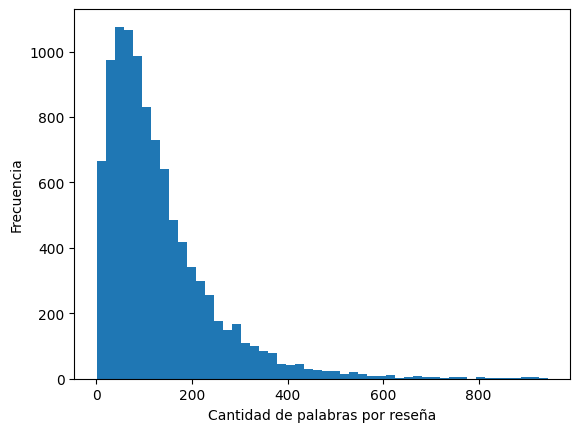

In [ ]:
# Histograma de la distribución de longitudes
import matplotlib.pyplot as plt
plt.hist(df['num_words'], bins=50)
plt.xlabel('Cantidad de palabras por reseña')
plt.ylabel('Frecuencia')
plt.show()

## 5.2 Tamaño del vocabulario

Se debe definir num_words, que es la cantidad de palabras únicas que el Tokenizer debe considerar.

In [ ]:
from collections import Counter

In [ ]:
# Contar la frecuencia de las palabras en todo el dataset
all_words = " ".join(df['text']).split()
word_counts = Counter(all_words)

In [ ]:
# Mostrar las 10 palabras más comunes
print(word_counts.most_common(10))

[('the', 54809), ('and', 42015), ('a', 34951), ('I', 34293), ('to', 29621), ('of', 20615), ('was', 19627), ('is', 16809), ('for', 14327), ('in', 13724)]


In [ ]:
# Ver cuántas palabras aparecen al menos 5 veces
min_freq = 5
filtered_words = [word for word, count in word_counts.items() if count >= min_freq]
print(f"Cantidad de palabras con frecuencia >= {min_freq}: {len(filtered_words)}")

Cantidad de palabras con frecuencia >= 5: 14303


## 5.3 Tokenizacion

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Definir el número máximo de palabras en el vocabulario y la longitud fija para las reviews
vocabulary_size = 10000 # Solo se considerarán las 10,000 palabras más comunes.
max_len = 130 # Longitud máxima de cada review basada en el análisis de distribución previo.

In [ ]:
# Inicializar el tokenizador
tokenizer = Tokenizer(num_words=vocabulary_size, oov_token="<OOV>")
tokenizer.fit_on_texts(xtrain) # Se entrena el tokenizador con el conjunto de entrenamiento (xtrain).

### Embeddings GloVe

GloVe (Global Vectors for Word Representation) es un conjunto de embeddings preentrenados que representan palabras como vectores numéricos.

In [ ]:
# Descargar embeddings GloVe de 100 dimensiones (~160MB)
!unzip -q glove.6B.zip

In [ ]:
embedding_dim = 100  # dimensión del vector GloVe (100 en este caso, ya que usamos glove.6B.100d.txt)

# Cargar GloVe en un diccionario
embeddings_index = {}
with open("glove.6B.100d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = coefs

print(f"Palabras cargadas desde GloVe: {len(embeddings_index)}")

Palabras cargadas desde GloVe: 400001


In [ ]:
# Inicializar la matriz de embeddings con ceros
embedding_matrix = np.zeros((vocabulary_size, embedding_dim))

# Llenar la matriz de embeddings con los vectores correspondientes del archivo GloVe
for word, i in tokenizer.word_index.items():
    if i < vocabulary_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
from tensorflow.keras.layers import Embedding

# Crear la capa de Embedding con pesos preentrenados
embedding_layer = Embedding(
    input_dim=vocabulary_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=max_len,
    trainable=False
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
print("Forma de la embedding matrix:", embedding_matrix.shape) # Forma de la matriz
print("Primeros 5 vectores no nulos:")
print(embedding_matrix[1:6])

Forma de la embedding matrix: (10000, 100)
Primeros 5 vectores no nulos:
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   

In [ ]:
print(embedding_layer.get_weights()[0].shape)  # Debería mostrar (10000, 100)

(10000, 100)


## 5.4 Vectorizacion

In [ ]:
# Convierte las reviews en listas de números, donde cada número representa una palabra del vocabulario entrenado.
x_train_sequences = tokenizer.texts_to_sequences(xtrain)
x_test_sequences = tokenizer.texts_to_sequences(xtest)

In [ ]:
# Mostrando un ejemplo de esa vectorizacion
print(xtrain.iloc[0]) # Texto original
print(x_train_sequences[0]) # Mismo texto version numerica

How much is good pizza worth? Is it worth being subjugated by a tyrranical owner slinging expensive pizza? 

Maybe, but only if it's really good, which the pizza at Joe's happens to be. Decisions, decisions. 

It smacks of the soup nazi in its unfortunate contradiction. If the pizza weren't so delicious, this would be a quick and decisively negative review. Sadly, for me the reviewer, for me the consumer, it isn't that easy.

My suggestion is to go during the day, before Joe is embittered by partiers and the lunch special is readily available.
[124, 98, 9, 27, 130, 230, 9, 10, 230, 191, 1, 72, 5, 1, 469, 1, 656, 130, 267, 15, 68, 38, 48, 54, 27, 63, 2, 130, 28, 1456, 2030, 6, 33, 5420, 5420, 10, 1, 7, 2, 325, 9867, 12, 193, 3691, 8485, 38, 2, 130, 763, 26, 131, 18, 59, 33, 5, 406, 3, 1, 1576, 291, 1612, 11, 37, 2, 3042, 11, 37, 2, 4798, 10, 387, 13, 536, 14, 2185, 9, 6, 49, 358, 2, 145, 156, 2139, 9, 1, 72, 1, 3, 2, 142, 277, 9, 4799, 652]


In [ ]:
# Padding para hacer que todas las secuencias tengan la misma longitud
x_train_padded = pad_sequences(x_train_sequences, maxlen=max_len, padding='post')
x_test_padded = pad_sequences(x_test_sequences, maxlen=max_len, padding='post')

In [ ]:
# Verificar que las secuencias tengan la misma longitud
print(x_train_padded.shape) # Debería mostrar (número de reseñas, 130)
print(x_test_padded.shape) # Ver una reseña tokenizada con padding

(8000, 130)
(2000, 130)


# 6. Red Neuronal Recurrente RNN sin memoria

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Bidirectional, BatchNormalization, LayerNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers, initializers
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential([
    embedding_layer,  # Capa con GloVe
    Bidirectional(SimpleRNN(64, return_sequences=False, recurrent_dropout=0.4, kernel_initializer=initializers.Orthogonal(), bias_initializer='zeros')),  # RNN sin memoria
    LayerNormalization(epsilon=1e-5), # LN se aplica escalando todas las palabras dentro de cada oración (normalización)
    Dense(64, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=regularizers.l2(0.005)),  # Capa densa con activación ReLU + Dropout + L2
    Dropout(0.3),
    Dense(5, activation='softmax')  # Clasificación en 5 clases (1 a 5 estrellas)
])

In [ ]:
# Compilacion del modelo
model.compile(
    optimizer = Adam(learning_rate=0.0008, clipnorm=1.0), # optimizador adam
    loss = 'categorical_crossentropy', # en este caso es la mejor loss function
    metrics = ['accuracy'] # Ver como evoluciona el accuracy en cada epoch
    )

In [ ]:
# Agregar el Early Stoppong
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Probamos con 30 epochs para que entrene la red neuronal
history = model.fit(x_train_padded, y_train_encoded, epochs=30, validation_data=(x_test_padded, y_test_encoded), callbacks=[early_stop])

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - accuracy: 0.3091 - loss: 2.0671 - val_accuracy: 0.3400 - val_loss: 1.7072
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 67ms/step - accuracy: 0.3473 - loss: 1.7212 - val_accuracy: 0.3505 - val_loss: 1.5869
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.3370 - loss: 1.6009 - val_accuracy: 0.3590 - val_loss: 1.5077
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.3567 - loss: 1.5248 - val_accuracy: 0.3780 - val_loss: 1.4622
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.3718 - loss: 1.4769 - val_accuracy: 0.3690 - val_loss: 1.4327
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.3613 - loss: 1.4494 - val_accuracy: 0.3770 - val_loss: 1.4141
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - accuracy: 0.3732 - loss: 1.4377 - val_accuracy: 0.3850 - val_loss: 1.3968
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 77ms/step - accuracy: 0.3690 - loss: 1.4256 - 

# 7. Metricas para el modelo Red Neuronal Recurrente RNN sin memoria

In [ ]:
# Evaluar en test
test_loss, test_acc = model.evaluate(x_test_padded, y_test_encoded)
print(f"Precisión en test: {test_acc:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3883 - loss: 1.3448
Precisión en test: 0.3825


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


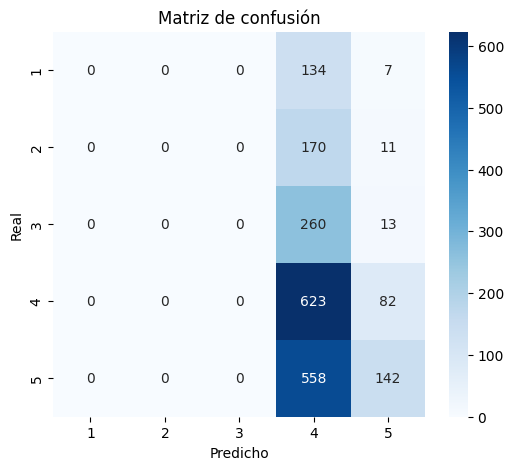

In [ ]:
# Matriz de confusión
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predicciones
y_pred = np.argmax(model.predict(x_test_padded), axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()

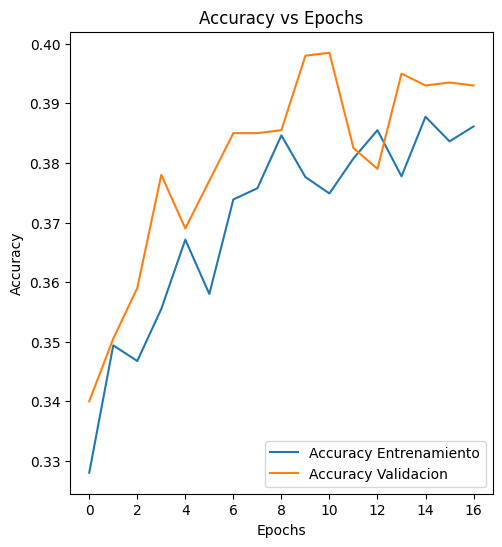

In [ ]:
# Grafica de accuracy

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Accuracy Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy Validacion')
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

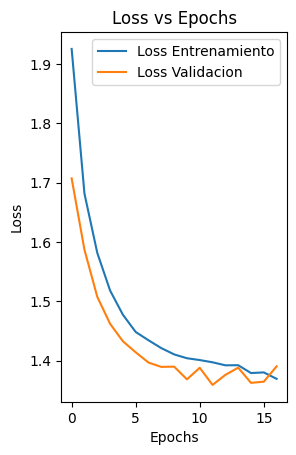

In [ ]:
# Grafica de Loss

# plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Loss Entrenamiento')
plt.plot(history.history['val_loss'], label='Loss Validacion')
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 8. Red Neuronal LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Bidirectional, BatchNormalization, LayerNormalization, LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers, initializers
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential([
    embedding_layer,  # Capa con GloVe
    Bidirectional(LSTM(64, return_sequences=False, recurrent_dropout=0.4, kernel_initializer=initializers.Orthogonal(), bias_initializer='zeros')),  # Red LSTM
    LayerNormalization(epsilon=1e-5),
    Dense(64, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=regularizers.l2(0.005)),  # Capa densa con activación ReLU + Dropout + L2
    Dropout(0.3),
    Dense(5, activation='softmax')  # Clasificación en 5 clases (1 a 5 estrellas)
])

In [ ]:
# Compilacion del modelo
model.compile(
    optimizer = Adam(learning_rate=0.0008, clipnorm=1.0), # optimizador adam
    loss = 'categorical_crossentropy', # en este caso es la mejor loss function
    metrics = ['accuracy'] # Ver como evoluciona el accuracy en cada epoch
    )

In [ ]:
# Agregar el Early Stoppong
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Probamos con 30 epochs para que entrene la red neuronal
history = model.fit(x_train_padded, y_train_encoded, epochs=30, validation_data=(x_test_padded, y_test_encoded), callbacks=[early_stop])

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 89s 325ms/step - accuracy: 0.3478 - loss: 1.8460 - val_accuracy: 0.3705 - val_loss: 1.5900
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 76s 301ms/step - accuracy: 0.3624 - loss: 1.5466 - val_accuracy: 0.3950 - val_loss: 1.3989
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 75s 299ms/step - accuracy: 0.3887 - loss: 1.4180 - val_accuracy: 0.4290 - val_loss: 1.2998
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 74s 294ms/step - accuracy: 0.4279 - loss: 1.2999 - val_accuracy: 0.4515 - val_loss: 1.2516
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 75s 297ms/step - accuracy: 0.4583 - loss: 1.2453 - val_accuracy: 0.4665 - val_loss: 1.2130
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 86s 313ms/step - accuracy: 0.4687 - loss: 1.2043 - val_accuracy: 0.4715 - val_loss: 1.2041
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 80s 305ms/step - accuracy: 0.4910 - loss: 1.1569 - val_accuracy: 0.4730 - val_loss: 1.1921
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 78s 314ms/step - accuracy: 0.5197 - loss: 1

# 9. Metricas para el modelo Red Neuronal LSTM

In [ ]:
# Evaluar en test
test_loss, test_acc = model.evaluate(x_test_padded, y_test_encoded)
print(f"Precisión en test: {test_acc:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.4788 - loss: 1.1927
Precisión en test: 0.4880


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step


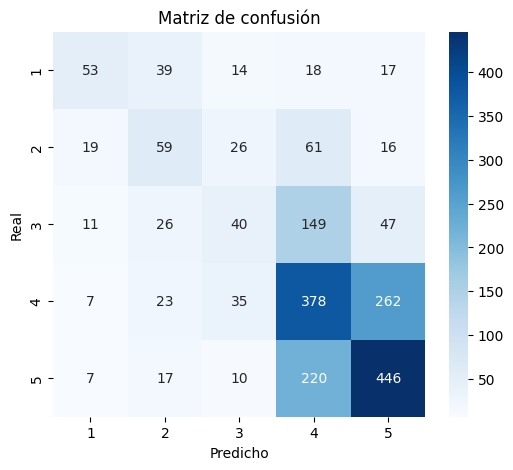

In [ ]:
# Matriz de confusión
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predicciones
y_pred = np.argmax(model.predict(x_test_padded), axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()

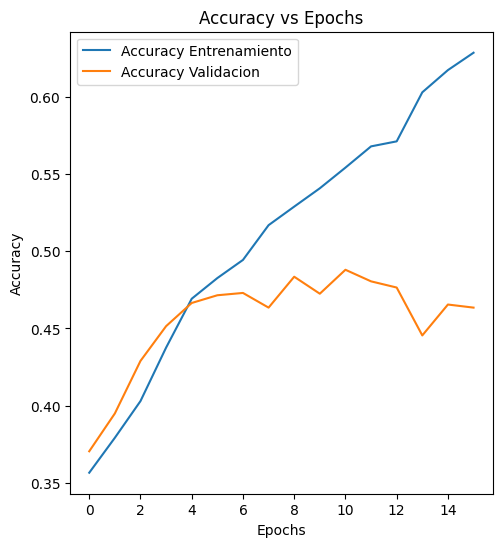

In [ ]:
# Grafica de accuracy

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Accuracy Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy Validacion')
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

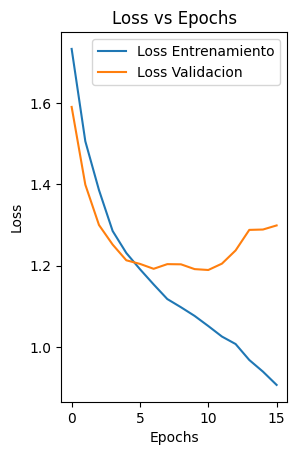

In [ ]:
# Grafica de Loss

# plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Loss Entrenamiento')
plt.plot(history.history['val_loss'], label='Loss Validacion')
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 10. Red Neuronal GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Bidirectional, BatchNormalization, LayerNormalization, LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers, initializers
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential([
    embedding_layer,  # Capa con GloVe
    Bidirectional(GRU(64, return_sequences=False, recurrent_dropout=0.4, kernel_initializer=initializers.Orthogonal(), bias_initializer='zeros')),  # RNN sin memoria
    LayerNormalization(epsilon=1e-5),
    Dense(64, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=regularizers.l2(0.005)),  # Capa densa con activación ReLU + Dropout + L2
    Dropout(0.3),
    Dense(5, activation='softmax')  # Clasificación en 5 clases (1 a 5 estrellas)
])

In [ ]:
# Compilacion del modelo
model.compile(
    optimizer = Adam(learning_rate=0.0008, clipnorm=1.0), # optimizador adam
    loss = 'categorical_crossentropy', # en este caso es la mejor loss function
    metrics = ['accuracy'] # Ver como evoluciona el accuracy en cada epoch
    )

In [ ]:
# Agregar el Early Stoppong
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Probamos con 30 epochs para que entrene la red neuronal
history = model.fit(x_train_padded, y_train_encoded, epochs=30, validation_data=(x_test_padded, y_test_encoded), callbacks=[early_stop])

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 105s 381ms/step - accuracy: 0.3294 - loss: 1.9453 - val_accuracy: 0.3940 - val_loss: 1.5985
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 122s 301ms/step - accuracy: 0.3740 - loss: 1.5865 - val_accuracy: 0.3915 - val_loss: 1.4752
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 303ms/step - accuracy: 0.4006 - loss: 1.4574 - val_accuracy: 0.4280 - val_loss: 1.3405
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 84s 313ms/step - accuracy: 0.4372 - loss: 1.3182 - val_accuracy: 0.4575 - val_loss: 1.2645
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 77s 306ms/step - accuracy: 0.4643 - loss: 1.2599 - val_accuracy: 0.4655 - val_loss: 1.2265
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 80s 299ms/step - accuracy: 0.4967 - loss: 1.1805 - val_accuracy: 0.4790 - val_loss: 1.2155
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 299ms/step - accuracy: 0.5000 - loss: 1.1634 - val_accuracy: 0.4815 - val_loss: 1.2148
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 86s 317ms/step - accuracy: 0.5267 - loss:

# 11. Metricas para el modelo Red Neuronal GRU

In [ ]:
# Evaluar en test
test_loss, test_acc = model.evaluate(x_test_padded, y_test_encoded)
print(f"Precisión en test: {test_acc:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.4810 - loss: 1.1824
Precisión en test: 0.4875


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step


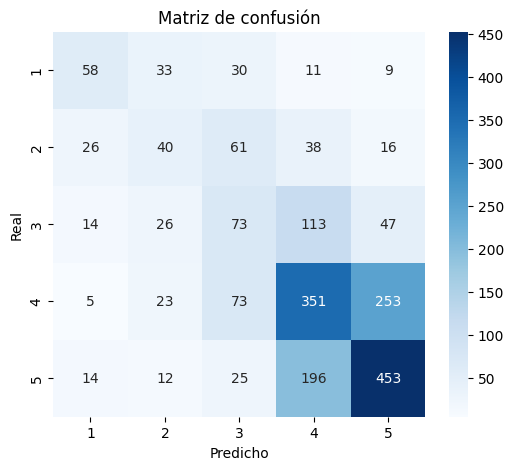

In [ ]:
# Matriz de confusión
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predicciones
y_pred = np.argmax(model.predict(x_test_padded), axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()

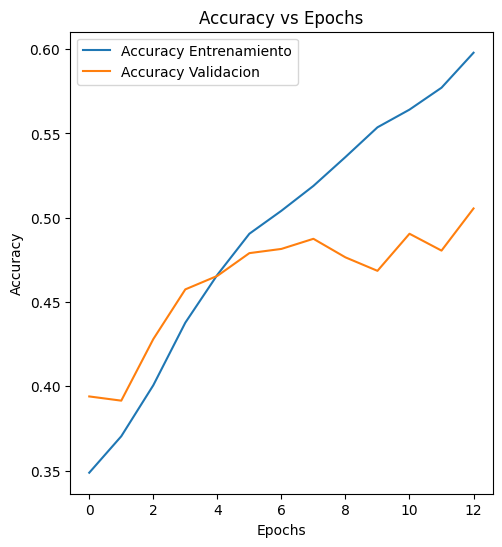

In [ ]:
# Grafica de accuracy

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Accuracy Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy Validacion')
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

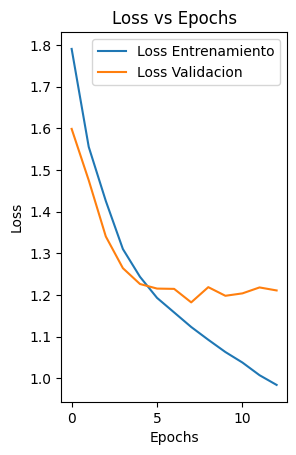

In [ ]:
# Grafica de Loss

# plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Loss Entrenamiento')
plt.plot(history.history['val_loss'], label='Loss Validacion')
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()